# Open up the local disk

In [1]:
import coiled

In [2]:
cluster = coiled.Cluster(n_workers=20)
client = cluster.get_client()

Output()

╭────────────────────────────────────────── Package Info ──────────────────────────────────────────╮
│                           ╷                                                                      │
│   Package                 │ Note                                                                 │
│ ╶─────────────────────────┼────────────────────────────────────────────────────────────────────╴ │
│   coiled_local_coiled     │ Source wheel built from C:\Users\gavargas\Developer\coiled           │
│                           ╵                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

h:\Miniconda\envs\coiled_test2\Lib\site-packages\distributed\client.py:1390: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | Client | Scheduler | Workers |
+---------+--------+-----------+---------+
| lz4     | 4.3.2  | 4.3.3     | 4.3.3   |
| toolz   | 0.12.0 | 0.12.1    | 0.12.1  |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


In [3]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

In [12]:
bucket_location = "s3://coiled-test-data-synthetic-seismic/synthetic_volume/"

In [13]:
local_dataset = xr.open_zarr(store=bucket_location)

In [14]:
seismic_data = local_dataset["synthetic_seismic"]

# Compute attributes

In [15]:
from d2geo.attributes.CompleTrace import ComplexAttributes
from d2geo.attributes.SignalProcess import SignalProcess

In [16]:
complex_attribute = ComplexAttributes()
signal_process = SignalProcess()

In [17]:
result = complex_attribute.envelope(darray=seismic_data)
# result = signal_process.histogram_equalization(darray=local_dataset.seismic)
# result = signal_process.histogram_equalization(darray=local_dataset.seismic)

h:\Miniconda\envs\coiled_test2\Lib\site-packages\dask\array\core.py:3470: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


In [18]:
# rechunked = result.rechunk((100, 100, 100))

In [ ]:
# rechunked.persist()

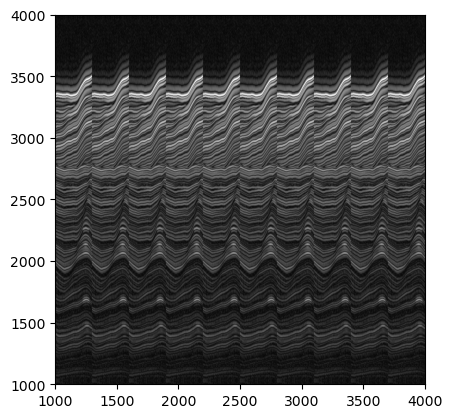

In [19]:
# plt.imshow((result[250, :, :]**(1/1.8)).T.compute(), cmap="gray", extent=[local_dataset.iline[0], local_dataset.iline[-1], local_dataset.xline[0], local_dataset.xline[-1]])
# plt.imshow((result[250, :, :]**(1/1.8)).T, cmap="gray", extent=[local_dataset.track_no[0], local_dataset.track_no[-1], local_dataset.bin_no[0], local_dataset.bin_no[-1]])

In [20]:
# result =  result.rechunk((595, 476, 10))

In [21]:
result

dask.array<rechunk-merge, shape=(3000, 3000, 1283), dtype=float16, chunksize=(595, 476, 10), chunktype=numpy.ndarray>

In [22]:
# result = result.persist()

In [12]:
# local_dataset = local_dataset.persist()

In [12]:
with ProgressBar():
  result.to_zarr(
      "s3://coiled-test-data-synthetic-seismic/complex_attributes2",
      mode="w",
      compute=True,
  )

h:\Miniconda\envs\coiled_test2\Lib\site-packages\zarr\creation.py:295: UserWarning: ignoring keyword argument 'mode'
  warn("ignoring keyword argument %r" % k)


In [23]:
cluster.shutdown()

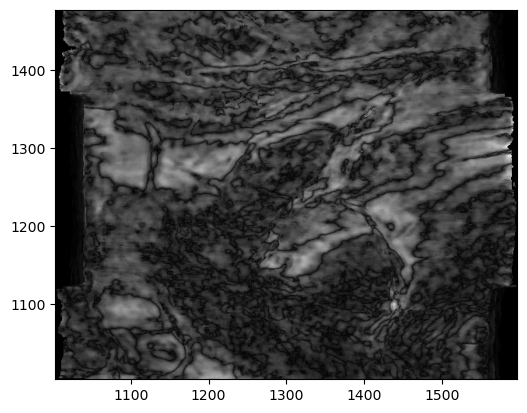

In [24]:
# plt.imshow((result[250, :, :]**(1/1.8)).T.compute(), cmap="gray", extent=[local_dataset.iline[0], local_dataset.iline[-1], local_dataset.xline[0], local_dataset.xline[-1]])
# plt.imshow((result[:, :, 250]**(1/1.8)).T.compute(), cmap="gray", extent=[local_dataset.iline[0], local_dataset.iline[-1], local_dataset.xline[0], local_dataset.xline[-1]])

In [21]:
# client.close()